# 6.4 Machine Learning Part 1

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = 'C:/Users/asus/Documents/Career Foundry/Achievement 6'

In [4]:
df = pd.read_csv(r"C:\Users\User\OneDrive\Dokumentumok\CF\Achievement 6\Boat_Sales\02 Data\Prepared Data\boat_data_clean7.csv")

### 2. Data cleaning

In [5]:
df.columns

Index(['Unnamed: 0', 'Price', 'Boat Type', 'Manufacturer', 'Type',
       'Year Built', 'Length', 'Width', 'Material', 'Location',
       'Number of views last 7 days', 'Currency', 'Price_in_CHF',
       'Views category', 'Country', 'City', 'Other', 'Boat_ID'],
      dtype='object')

In [7]:
df.head()

,Unnamed: 0,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency,Price_in_CHF,Views category,Country,City,Other,Boat_ID
0,0,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3295,Low number of views,Germany,Bönningstedt,NaN,1
1,1,3770,Sport Boat,Marine power boats,new boat from stock,2008,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF,3770,Middle number of views,Switzerland,Lake of Zurich,Stäfa ZH,2
2,2,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3209,Very low number of views,Germany,Bayern,München,3
3,3,3650,Sport Boat,Linder power boats,new boat from stock,2008,4.03,1.56,Aluminium,Switzerland Â» Lake Constance Â» Uttwil,132,CHF,3650,Middle number of views,Switzerland,Lake Constance,Uttwil,4
4,4,3500,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,Switzerland Â» Seengen,239,CHF,3500,High number of views,Switzerland,Seengen,NaN,5


In [6]:
df.shape

(6299, 18)

##### Missing values

In [8]:
# Check for missing values

df.isnull().sum()

# No missing values to handle, because Other is an optional data to Location

Unnamed: 0                        0
Price                             0
Boat Type                         0
Manufacturer                      0
Type                              0
Year Built                        0
Length                            0
Width                             0
Material                          0
Location                          0
Number of views last 7 days       0
Currency                          0
Price_in_CHF                      0
Views category                    0
Country                           0
City                              0
Other                          3786
Boat_ID                           0
dtype: int64

##### Duplicates check

In [9]:
dups = df.duplicated()

In [10]:
dups.shape # No dups

(6299,)

##### Extreme values checks

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


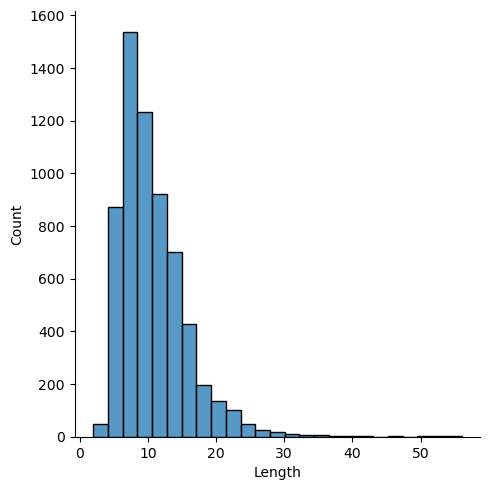

In [12]:
sns.displot(df['Length'], bins=25) # Shows extreme values

# no extreme values

In [13]:
df['Length'].mean() # Check the mean

10.692341641530401

In [14]:
df['Length'].median() # Check the median

9.7

In [15]:
df['Length'].max() # Check the max

56.0

### 3. Data prep for regression analysis 

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


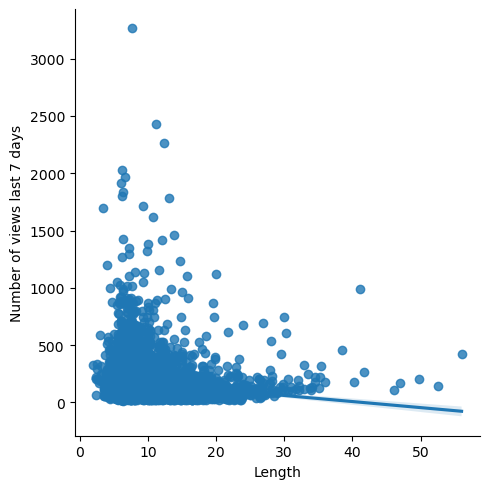

In [17]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

# Create a scatterplot for the "Lenght" and "'Number of views last 7 days'" columns in seaborn

sns.lmplot(x = 'Length', y = 'Number of views last 7 days', data = df)

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


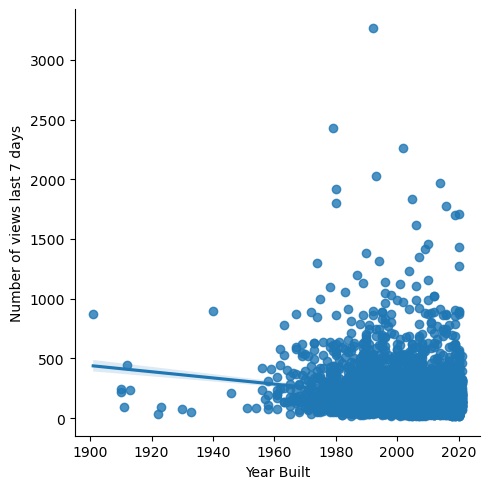

In [18]:
sns.lmplot(x = 'Year Built', y = 'Number of views last 7 days', data = df)

### 4. State my hypothesis
1. Bigger ships have more views.
2. Younger boats have more views.
3. Ships in the Americas have more views.

### 5. Reshape the variables

In [19]:
# Reshape the variables into NumPy arrays and put them into separate objects.

Z = df['Length'].values.reshape(-1,1)
X = df['Year Built'].values.reshape(-1,1)
y = df['Number of views last 7 days'].values.reshape(-1,1)

In [20]:
Z

array([[4.  ],
       [3.69],
       [3.55],
       ...,
       [6.  ],
       [4.4 ],
       [3.6 ]])

In [21]:
X

array([[2020],
       [2008],
       [2019],
       ...,
       [1984],
       [2020],
       [2019]], dtype=int64)

In [22]:
y

array([[ 75],
       [124],
       [ 58],
       ...,
       [288],
       [354],
       [194]], dtype=int64)

In [23]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [28]:
# Split data into a training set and a test set.

Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.3, random_state=0)

### 6. Regression analysis

#### Year Built vs Views

In [24]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [25]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [26]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

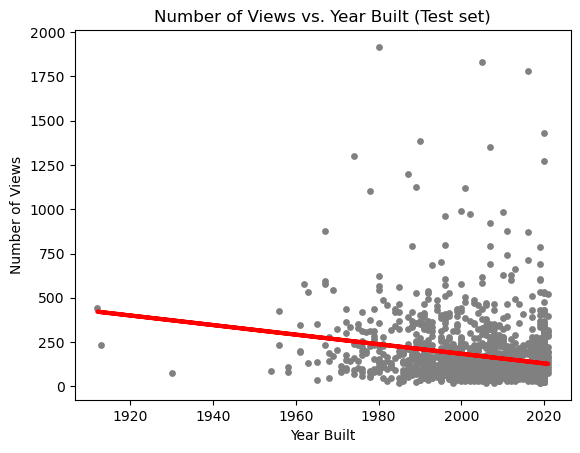

In [27]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of Views vs. Year Built (Test set)')
plot_test.xlabel('Year Built')
plot_test.ylabel('Number of Views')
plot_test.show()

The linear regression line fits well to the data.

#### Lenght vs Views

In [29]:
# Create a regression object.

regression2 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [30]:
# Fit the regression object onto the training set.

regression2.fit(Z_train, y_train)

LinearRegression()

In [35]:
# Predict the values of y using X.

y_predicted2 = regression2.predict(Z_test)

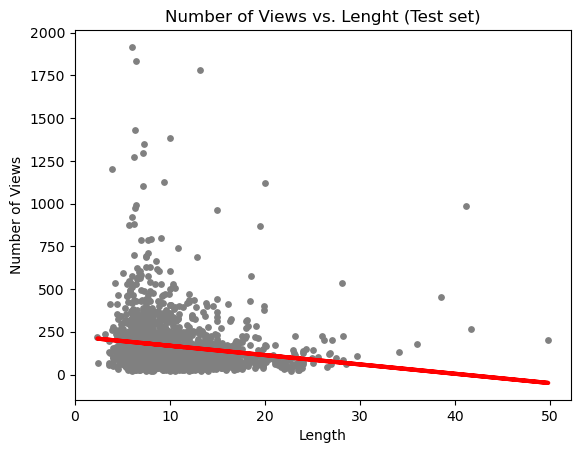

In [36]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(Z_test, y_test, color='gray', s = 15)
plot_test.plot(Z_test, y_predicted2, color='red', linewidth =3)
plot_test.title('Number of Views vs. Lenght (Test set)')
plot_test.xlabel('Length')
plot_test.ylabel('Number of Views')
plot_test.show()

The linear regression line fits well to the data.

### 7. check the models performance statistics

#### Year Built vs Views

In [33]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [34]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-2.70392536]]
Mean squared error:  25621.268025826328
R2 score:  0.03348693750914633


In [37]:
y_predicted

array([[167.30836522],
       [129.45341016],
       [161.9005145 ],
       ...,
       [140.26911161],
       [205.16332029],
       [164.60443986]])

In [38]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,93,167.308365
1,44,129.453410
2,35,161.900515
3,116,218.682947
4,90,145.676962
5,210,164.604440
6,67,129.453410
7,118,167.308365
8,22,213.275096
9,82,161.900515


These metrics indicate that the model has some level of error in its predictions.
I think that the online views of ships is a difficult-to-predict parameter and is less dependent on the ship's construction year, i.e., its age.